## Looking at segments: The Huntsville case

Initially, the notebook was planned to analyze the `Stream-Duration-Us` values of start segments. However, instability of the stream was noticed during the live: the last 3 minutes of the video stutters. The stuttering and gaps have been encountered before, but this is a good chance to demonstrate it.

The live stream was 16 minutes long and ended, and now refers to *Randolph Invitational 2023 - Oct 14, 2023 - John Hunt Running Park - Huntsville, AL* video (https://www.youtube.com/watch?v=sMF1XHrETEQ).

*Note added:* See ``./gap-cases/gap-case-1.ipynb`` notebook for a comparison of audio and video segments.

In [1]:
from datetime import datetime, timedelta, timezone
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
from matplotlib import colors
from matplotlib import pyplot as plt

from IPython.display import Image

from src.display import display_video_frame_at, display_first_video_frame, display_last_video_frame

%load_ext autoreload
%autoreload 1

%aimport src.display
%aimport src.plotting

In [2]:
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=mpl.cm.Set2.colors)
plt.rcParams["image.cmap"] = "Set2"

In [3]:
pd.set_option("display.float_format", "{:f}".format)

In [4]:
figure_dpi = 100
figure_size = (w := 440 * 1.5 / figure_dpi, w / 1.5)

In [5]:
SHARED_PATH = Path("./shared/")
SEGMENT_DURATION = 5

## Loading data

In [6]:
data = pd.read_csv(SHARED_PATH / "huntsville-metadata.csv", usecols=[0,1,3], index_col="sequence")
data /= 1e6

durations = pd.read_csv(SHARED_PATH / "huntsville-duration.csv", index_col="sequence")
data = pd.concat([data, durations], axis=1)
data

,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
0,1697288387.232156,0.000000,2.933333
1,1697288390.223914,5.000000,5.000000
2,1697288395.257537,10.000000,5.000000
3,1697288400.277016,12.933333,5.000000
4,1697288405.295870,17.933333,5.000000
...,...,...,...
197,1697289371.512683,979.275277,4.933333
198,1697289376.028039,984.408611,5.000000
199,1697289380.293198,989.341944,5.000000


In [7]:
timestamps = data[["Ingestion-Walltime-Us", "Stream-Duration-Us"]]
timestamp_diff_data = timestamps.shift(-1) - timestamps
timestamp_diff_data["duration"] = data["duration"]
timestamp_diff_data

,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
0,2.991758,5.000000,2.933333
1,5.033623,5.000000,5.000000
2,5.019479,2.933333,5.000000
3,5.018854,5.000000,5.000000
4,4.779970,5.000000,5.000000
...,...,...,...
197,4.515356,5.133334,4.933333
198,4.265159,4.933333,5.000000
199,5.017590,4.933333,5.000000


## Plotting Ingestion-Walltime-Us values

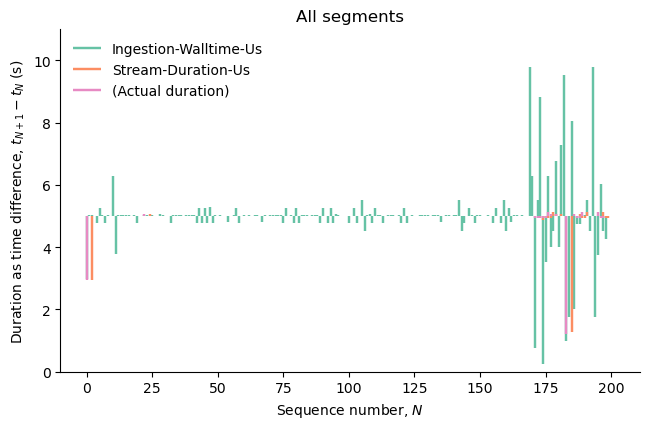

In [8]:
fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=figure_dpi)

plt.vlines(timestamp_diff_data.index, ymin=5, ymax=timestamp_diff_data["Ingestion-Walltime-Us"], colors="C0", lw=1.75, label="Ingestion-Walltime-Us")
plt.vlines(timestamp_diff_data.index, ymin=5, ymax=timestamp_diff_data["Stream-Duration-Us"], colors="C1", lw=1.75, label="Stream-Duration-Us")
plt.vlines(data.index, ymin=5, ymax=data["duration"], colors="C3", lw=1.75, label="(Actual duration)")

ax.set_xlabel("Sequence number, $N$")
ax.set_ylabel("Duration as time difference, $t_{N + 1} - t_N$ (s)")

ax.spines[["top", "right"]].set_visible(False)

ax.set_ylim(0, 11)

plt.title("All segments")
plt.legend(frameon=False, loc=2)

plt.tight_layout()

plt.show()

### Part I. Segments 0-166

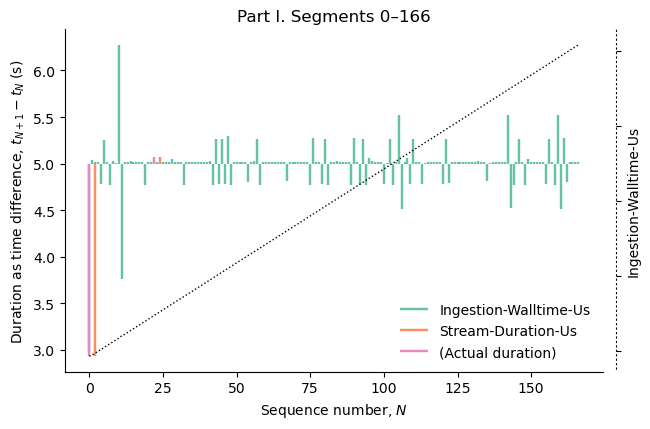

In [9]:
fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=figure_dpi)

S = slice(0, 166)
sliced_diff_data = timestamp_diff_data.loc[S]

# Main axis
plt.vlines(sliced_diff_data.index, ymin=5, ymax=sliced_diff_data["Ingestion-Walltime-Us"], colors="C0", lw=1.75, label="Ingestion-Walltime-Us")
plt.vlines(sliced_diff_data.index, ymin=5, ymax=sliced_diff_data["Stream-Duration-Us"], colors="C1", lw=1.75, label="Stream-Duration-Us")
plt.vlines(sliced_diff_data.index, ymin=5, ymax=sliced_diff_data["duration"], colors="C3", lw=1.75, label="(Actual duration)")

ax.spines[["top", "right"]].set_visible(False)

ax.set_xlabel("Sequence number, $N$")
ax.set_ylabel("Duration as time difference, $t_{N + 1} - t_N$ (s)")


# Secondary axis
ax2 = ax.twinx()

ax2.spines[["top", "bottom", "left"]].set_visible(False)
ax2.tick_params(axis="y", which="both", right=True, labelright=False)
ax2.spines.right.set_position(("axes", 1.025))

ax2.set_ylabel("Ingestion-Walltime-Us")

ax2.plot(data.loc[S].index, data.loc[S, "Ingestion-Walltime-Us"], ls=":", c="k", lw=1)

for spine in ax2.spines.values():
    spine.set_linestyle((1, (1, 3)))


plt.title(f"Part I. Segments {S.start}–{S.stop}")
ax.legend(frameon=False, loc=4)

plt.tight_layout()

plt.show()

In [10]:
display(timestamp_diff_data.loc[0:3])
display(timestamp_diff_data.loc[8:13])

,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
0,2.991758,5.000000,2.933333
1,5.033623,5.000000,5.000000
2,5.019479,2.933333,5.000000
3,5.018854,5.000000,5.000000


,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
8,5.028802,5.000000,5.000000
9,5.011183,5.000000,5.000000
10,6.274126,5.000000,5.000000
11,3.766107,5.000000,5.000000
12,5.020881,5.000000,5.000000
13,5.021039,5.000000,5.000000


The notable thing is that for segments 10 and 11 the ``Ingestion-Walltime-Us`` difference values deviate slightly more from the metadata segment duration, ``Target-Duration-Us``, value than for other segments. The corresponding actual segment duration values are constant and equal to the metadata value. No stuttering was noticed on the video in these segments.

In [11]:
display((timestamp_diff_data.loc[9] + timestamp_diff_data.loc[10] + timestamp_diff_data.loc[11]) / 3.0) 

Ingestion-Walltime-Us   5.017139
Stream-Duration-Us      5.000000
duration                5.000000
dtype: float64

### Part II. Segments 167–200

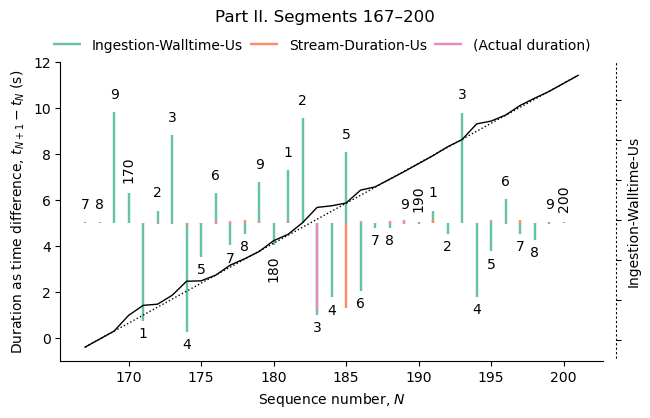

In [12]:
fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=figure_dpi)

S = slice(167, 201)
sliced_diff_data = timestamp_diff_data.loc[S]

# Main axis
plt.vlines(sliced_diff_data.index, ymin=5, ymax=sliced_diff_data["Ingestion-Walltime-Us"], colors="C0", lw=1.75, label="Ingestion-Walltime-Us")
plt.vlines(sliced_diff_data.index, ymin=5, ymax=sliced_diff_data["Stream-Duration-Us"], colors="C1", lw=1.75, label="Stream-Duration-Us")
plt.vlines(data.loc[S].index, ymin=5, ymax=data.loc[S]["duration"], colors="C3", lw=1.75, label="(Actual duration)")

ax.set_xlabel("Sequence number, $N$")
ax.set_ylabel("Duration as time difference, $t_{N + 1} - t_N$ (s)")

ax.spines[["top", "right"]].set_visible(False)

for (sequence, ingestion_diff) in sliced_diff_data["Ingestion-Walltime-Us"].items():   
    if ingestion_diff >= 5 + 0.01:
        xytext = (0, 10)
    else:
        xytext = (0, -12)
    
    if sequence == 180:
        xytext = (0, -24)
        
    rotation = 0 if sequence % 10 != 0 else 90
    text = sequence if sequence % 10 == 0 else str(sequence)[-1]
        
    ax.annotate(
        text=text,
        xy=(sequence, ingestion_diff),
        xytext=xytext,
        textcoords='offset points',
        ha="center",
        rotation=rotation,
    )

    
# Secondary axis
ax2 = ax.twinx()

predicted_ingestion = data.loc[S.start]["Ingestion-Walltime-Us"] + np.arange(len(data.loc[S])) * 5.0
ax2.plot(data.loc[S].index, predicted_ingestion, ls=":", c="k", lw=1)
ax2.plot(data.loc[S].index, (data.loc[S]["Ingestion-Walltime-Us"]), ls="-", c="k", lw=1)

ax2.set_ylabel("Ingestion-Walltime-Us")

ax2.spines[["top", "bottom", "left"]].set_visible(False)
ax2.spines.right.set_position(("axes", 1.025))
for spine in ax2.spines.values():
    spine.set_linestyle((1, (1, 3)))

ax2.tick_params(axis="y", which="both", right=True, labelright=False)


ax.set_ylim(-1, 12)
ax.set_ylim(-1, 12)
    
fig.suptitle(f"Part II. Segments {S.start}–{S.stop - 1}", y=0.94)
ax.legend(frameon=False, ncol=3, bbox_to_anchor=(1.0, 1.12), columnspacing=0.5, loc=1)

plt.tight_layout()

plt.show()

For segments 183 and 185, the deviated `Stream-Duration-Us` and actual duration values are again shifted by one segment relative to each other, the same as for segments 0 and 3.

In [13]:
display(timestamp_diff_data.loc[0:3])
display(timestamp_diff_data.loc[182:186])

,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
0,2.991758,5.000000,2.933333
1,5.033623,5.000000,5.000000
2,5.019479,2.933333,5.000000
3,5.018854,5.000000,5.000000


,Ingestion-Walltime-Us,Stream-Duration-Us,duration
sequence,,,
182,9.543628,5.000000,5.000000
183,1.000957,5.000000,1.200000
184,1.758989,5.000000,5.000000
185,8.057146,1.275278,5.000000
186,2.022848,5.000000,5.066667


## Focusing on the first gap

In [14]:
timestamp_diff_data.loc[168:172, ["Ingestion-Walltime-Us", "duration"]]

,Ingestion-Walltime-Us,duration
sequence,,
168,5.017739,5.000000
169,9.800306,5.000000
170,6.280413,5.000000
171,0.747786,4.933333
172,5.522294,4.933333


Segment 169


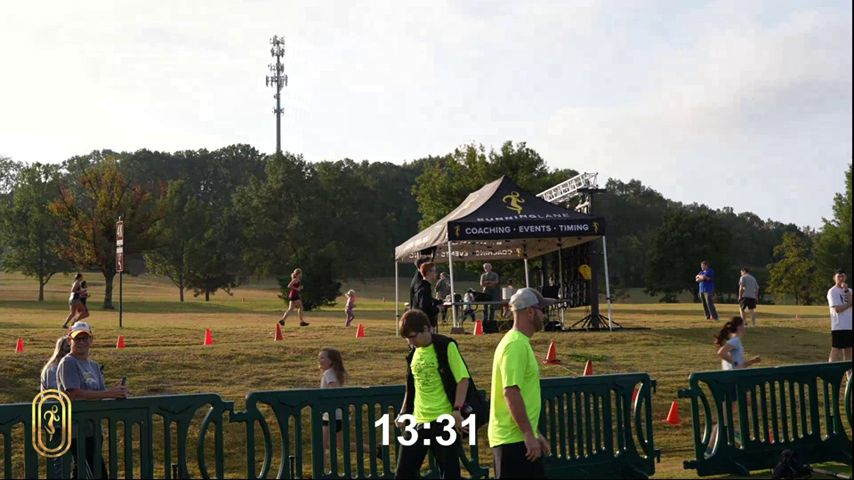

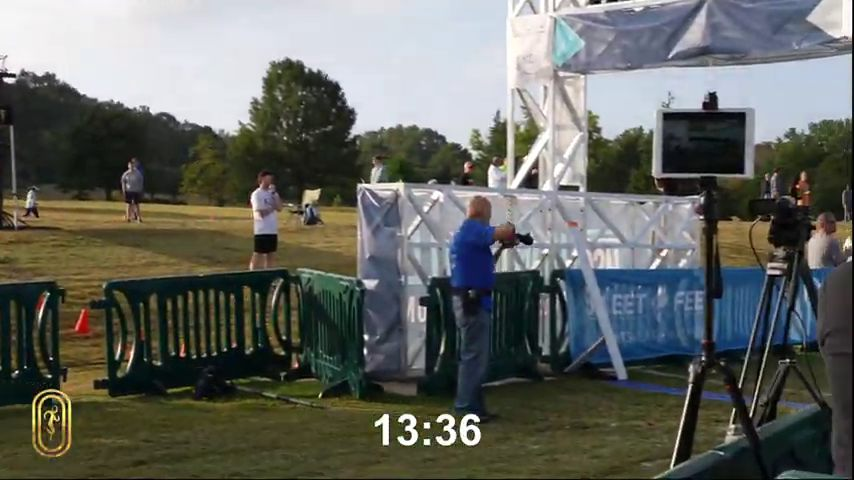

In [15]:
segment = 169
print(f"Segment {segment}")
display_first_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")
display_last_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")

Well, this segment looks normal, without any quirks.

Segment 170


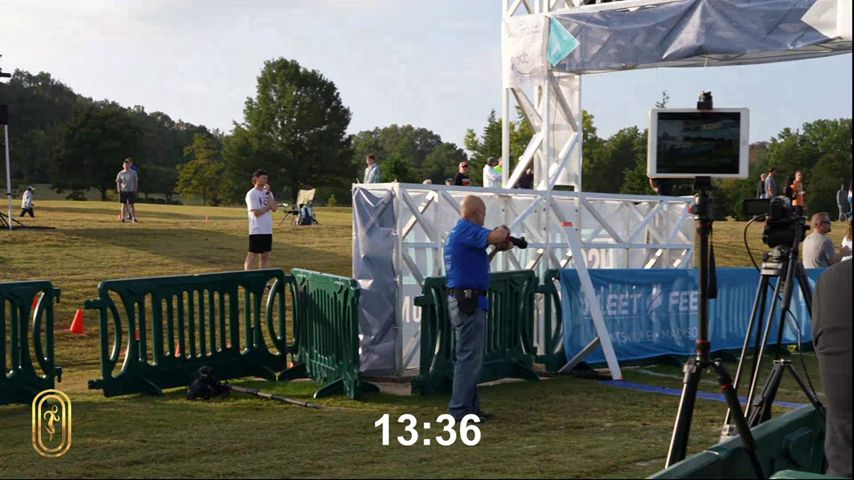

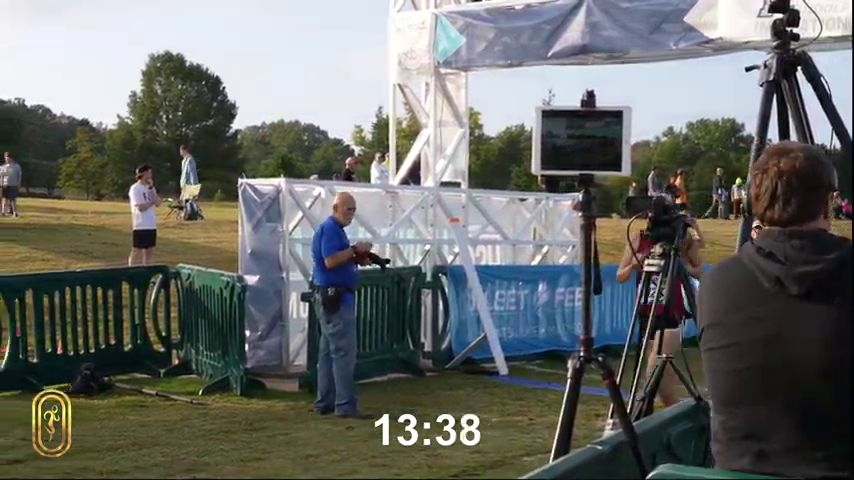

In [16]:
segment = 170
print(f"Segment {segment}")
display_first_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")
display_last_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")

The segment 170 freezes in the middle till the end.

Segment 171


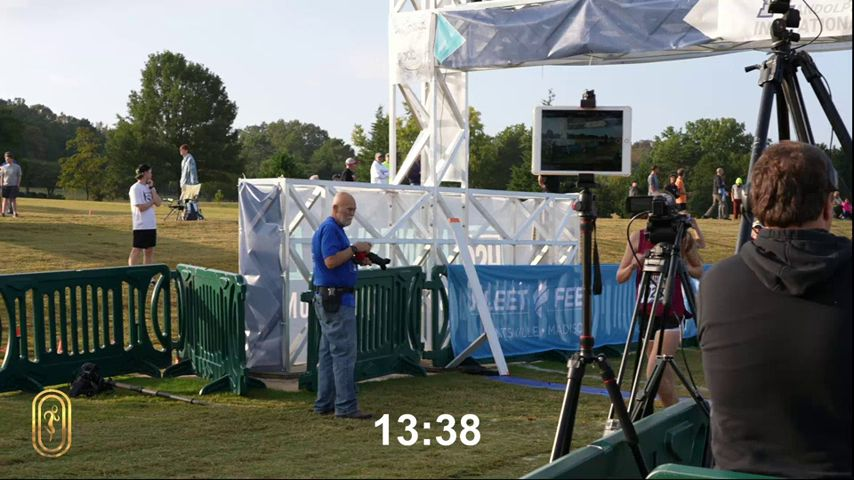

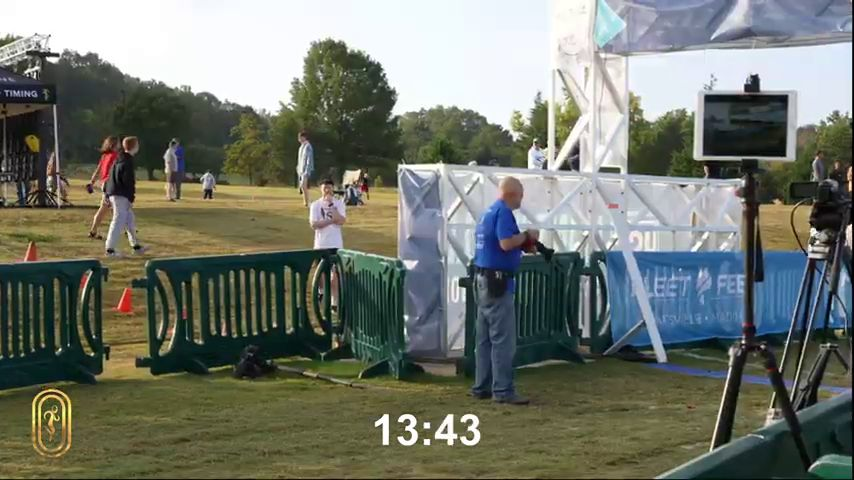

In [17]:
segment = 171
print(f"Segment {segment}")
display_first_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")
display_last_video_frame(SHARED_PATH / f"hun-{segment}-i135.mp4")

Segment 171 just shows two time codes for us: starting from frozen 13:38 and jumping to 13:43 (also frozen).

## Examining MPEG-DASH MPD

In [18]:
timeline_data = pd.read_csv(SHARED_PATH / "huntsville-segment-timeline.csv", index_col="sequence")
timeline_data

,d,yt:sid
sequence,,
0,2933,NaN
1,5000,NaN
2,5000,NaN
3,5000,NaN
4,5000,NaN
...,...,...
197,4933,NaN
198,5000,NaN
199,5000,NaN


In [19]:
timeline_data[timeline_data["yt:sid"].notna()]

,d,yt:sid
sequence,,
171,4933,-2964.000000
172,4933,5007.000000
173,4933,-280.000000
174,4933,-1133.000000
175,4933,1322.000000
176,5133,-1903.000000
183,1275,3704.000000
187,4933,-3859.000000
188,4933,3852.000000


In [20]:
def apply_gradient_to_bars(bars):
    axis = bars[0].axes
    axis_lims = axis.get_xlim() + axis.get_ylim()
    
    gradient = np.atleast_2d(np.linspace(0, 1, 255)).T
    cmap = colors.LinearSegmentedColormap.from_list(
        "custom", [bars[0].get_facecolor(), "white", "white"]
    )
    
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()    
        axis.imshow(gradient, cmap, extent=[x, x + w, y - 2, y + h], aspect="auto", zorder=0)
        
    axis.axis(axis_lims)

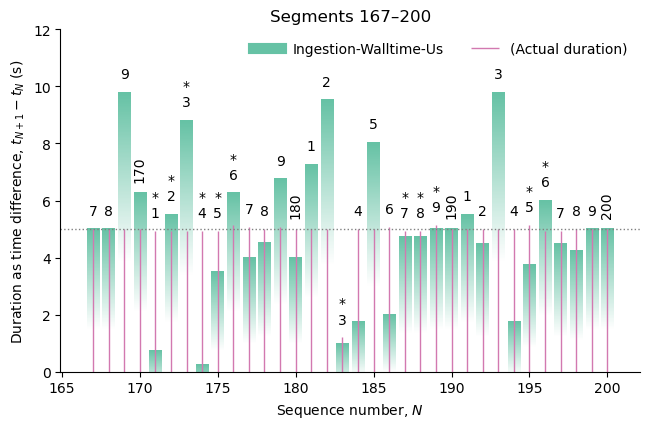

In [21]:
fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=figure_dpi)

S = slice(167, 200)
sliced_diff_data = timestamp_diff_data.loc[S]

ingestion_color = "C0"
duration_color = sns.set_hls_values(mpl.cm.Set2.colors[3], s=0.5, l=0.65)

# Plot data
bars = ax.bar(
    x=sliced_diff_data.index,
    height=sliced_diff_data["Ingestion-Walltime-Us"],
    color=mpl.cm.Set2.colors[0],
    label="Ingestion-Walltime-Us",
    width=0.8,
)
apply_gradient_to_bars(bars)

plt.vlines(
    sliced_diff_data.index, 0, sliced_diff_data["duration"], duration_color, lw=1, label="(Actual duration)"
)

ax.axhline(SEGMENT_DURATION, ls=":", color="gray", lw=1)

# Annotate data
sids_in_timeline = timeline_data.index[timeline_data["yt:sid"].notna()]
for (sequence, ingestion_diff) in sliced_diff_data["Ingestion-Walltime-Us"].items():
    if ingestion_diff >= sliced_diff_data.loc[sequence]["duration"]:
        y = ingestion_diff
    else:
        y = sliced_diff_data.loc[sequence]["duration"]
        
    rotation = 0 if sequence % 10 != 0 else 90
    text = sequence if sequence % 10 == 0 else str(sequence)[-1]
    
    if sequence in sids_in_timeline:
        text = "*\n" + text
        weight="bold"
    else:
        weight="normal"
    
    ax.annotate(
        text,
        (sequence, y),
        (0, 10),
        textcoords='offset points',
        ha="center",
        style="normal",
        weight="normal",
        rotation=rotation,
    )

ax.set_xlabel("Sequence number, $N$")
ax.set_ylabel("Duration as time difference, $t_{N + 1} - t_N$ (s)")

ax.set_ylim(0, 12)
ax.spines[["top", "right"]].set_visible(False)

legend_handles, legend_labels = ax.get_legend_handles_labels()
legend = ax.legend(legend_handles[::-1], legend_labels[::-1], frameon=False, ncol=2, loc=0)

legend_handles[1] = mpl.lines.Line2D([], [], color="C0", lw=8)
legend._legend_box = None
legend._init_legend_box(legend_handles[::-1], legend_labels[::-1])
legend._set_loc(legend._loc)
legend.set_title(None)

plt.title(f"Segments {S.start}–{S.stop}")

plt.tight_layout()
plt.show()

### Recreating the segment timeline

The MPEG-DASH MPD contains YouTube-specific `yt:segmentIngestTime` tag:
    
    <Period start="PT0.000S" yt:segmentIngestTime="2023-10-14T12:59:47.123">

In [22]:
yt_segment_ingest_date = datetime.fromisoformat("2023-10-14T12:59:47.123+00:00")
yt_segment_ingest_time = yt_segment_ingest_date.timestamp()
print(yt_segment_ingest_date)

2023-10-14 12:59:47.123000+00:00


Interestingly, the value slightly differs from the `Ingestion-Walltime-Us` of the first segment:

In [23]:
print(yt_segment_ingest_time, "<", data.loc[0, "Ingestion-Walltime-Us"])

1697288387.123 < 1697288387.232156


Looking into `base.js` file, we could find a function uses the value of that tag. Here is some extracted lines:

```javascript
var e = +YI(a, "timescale") || 1;

var m = Date.parse(xva(YI(a, "yt:segmentIngestTime"))) / 1000;

for (d = a.next(); !d.done; d = a.next()) {
    d = d.value;
    for (var n = +d.getAttribute("d") / e,
		     p = (+d.getAttribute("yt:sid") || 0) / e,
             q = +d.getAttribute("r") || 0,
             t = 0; t <= q; t++)
	    ...
            ...
		    m += n + p;
}
```

The function iterates over `<S />` elements, extracting `d` and `yt:sid` attributes (by repeating it if an `r` attribute is found), and adding these values to the `yt:segmentIngestTime` timestamp.

So, let's try it on the parsed manifest data.

In [24]:
recreated_from_timeline = yt_segment_ingest_time + (
    (timeline_data["d"].cumsum() - timeline_data.loc[0, "d"] + timeline_data["yt:sid"].fillna(0)) / 1e3
)

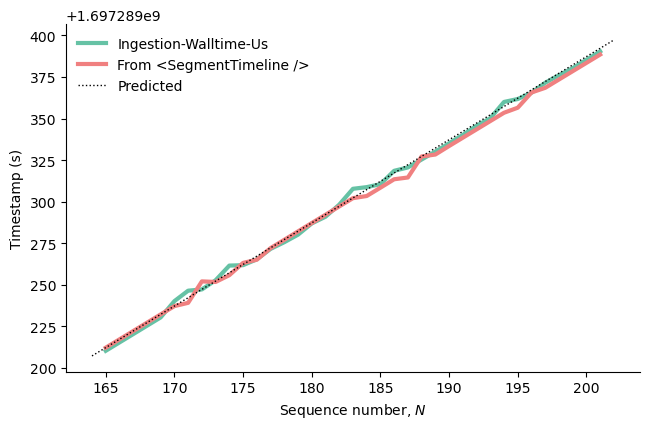

In [25]:
fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=figure_dpi)

S = slice(165, 201)
sliced_data = data.loc[S]

ax.plot(sliced_data.index, sliced_data["Ingestion-Walltime-Us"], c="C0", lw=3, label="Ingestion-Walltime-Us")
ax.plot(sliced_data.index, recreated_from_timeline.loc[S], c="lightcoral", lw=3, label="From <SegmentTimeline />")

# Also, plot the predicted line of constant duration
# (starting from the Ingestion-Walltime-Us value of the first segment):
xs = np.arange(0, S.stop + 2)
predicted = data.loc[0, "Ingestion-Walltime-Us"] + np.arange(0, len(xs)) * SEGMENT_DURATION
ax.plot(xs[S.start-1:S.stop+2], predicted[S.start-1:S.stop+2] , ls=":", c="k", lw=1, label="Predicted")

ax.set_xlabel("Sequence number, $N$")
ax.set_ylabel("Timestamp (s)")

ax.spines[["top", "right"]].set_visible(False)

ax.legend(frameon=False, ncol=1)

plt.tight_layout()

plt.show()